# 데이터 준비하기  
 - ###  PIL 라이브러리 불러오기 / 설치  
#### 숫자 손글씨 크기가 28x28 이므로 가위,바위, 보 이미지 resize 필요 

In [1]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


 - ### 가위, 바위, 보 이미지 resize

In [2]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


In [3]:
import os
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


In [4]:
import os
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


 - ### 데이터 읽기 'load_data 함수 만들기'

In [5]:
import numpy as np
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=4465   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 4465 입니다.
x_train shape: (4465, 28, 28, 3)
y_train shape: (4465,)


- ### 이미지 부르기

라벨:  0


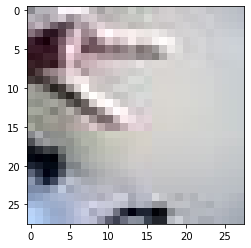

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 딥러닝 네트워크 설계하기

In [7]:
# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1 =16    # 이미지 특징 수 (디테일 할 수록 숫자 up)
n_channel_2 = 32
n_dense = 32       # 분류기에 사용될 뉴런 수 (복잡할 수 록 up)
n_dense_2 = 3      # 최종 분류 할 클래스 수 (가위 바위 보 3가지)

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3), activity_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'), activity_regularizer=tf.keras.regularizers.l2(0.01))
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'), activity_regularizer=tf.keras.regularizers.l2(0.01))
model.add(keras.layers.Dense(n_dense_2, activation='softmax'))


model.summary()

TypeError: add() got an unexpected keyword argument 'activity_regularizer'

# 딥러닝 네트워크 학습  시키기

In [177]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10,batch_size = 10, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/10
358/358 [==============================] - 1s 2ms/step - loss: 0.0226 - accuracy: 0.9938 - val_loss: 0.0264 - val_accuracy: 0.9888
Epoch 2/10
358/358 [==============================] - 1s 2ms/step - loss: 0.0278 - accuracy: 0.9927 - val_loss: 0.1614 - val_accuracy: 0.9406
Epoch 3/10
358/358 [==============================] - 1s 2ms/step - loss: 0.0323 - accuracy: 0.9899 - val_loss: 0.0094 - val_accuracy: 0.9978
Epoch 4/10
358/358 [==============================] - 1s 2ms/step - loss: 0.0239 - accuracy: 0.9944 - val_loss: 0.0220 - val_accuracy: 0.9866
Epoch 5/10
358/358 [==============================] - 1s 2ms/step - loss: 0.0244 - accuracy: 0.9952 - val_loss: 0.0134 - val_accuracy: 0.9933
Epoch 6/10
358/358 [==============================] - 1s 2ms/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.0191 - val_accuracy: 0.9910
Epoch 7/10
358/358 [==============================] - 1s 2ms/step - loss: 0.0407 - accuracy: 0.9910 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 

# 잘 만들어 진건가?  
  - ### testset 구성하기 / test accuracy 측정

In [178]:
def load_test_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=685   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

test_image_dir_path = os.getenv("HOME") + "/aiffel/test_data"
(x_test, y_test)=load_test_data(test_image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트 데이터(x_test)의 이미지 개수는 685 입니다.
x_test shape: (685, 28, 28, 3)
y_test shape: (685,)


In [179]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

22/22 - 0s - loss: 640.0036 - accuracy: 0.5620
test_loss: 640.0036010742188 
test_accuracy: 0.5620437860488892
